---
title: 常用数据集
categories: others
date: 2020-10-22
---

本文主要介绍一些常用的数据集，并采用python代码来获取它们。不定期更新中。

## MNIST

[MNIST](http://yann.lecun.com/exdb/mnist/)（Mixed National Institute of Standards and Technology）数据集是著名的手写数字数据集，被誉为数据科学领域的`果蝇`。

![img](images/8389494-c279133be28eb263.webp)

数据分为四部分。

| 数据文件                                                     | 描述         | 数据量 |
| ------------------------------------------------------------ | ------------ | ------ |
| [train-images-idx3-ubyte.gz](http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz) | training图片 | 60,000 |
| [train-labels-idx1-ubyte.gz](http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz) | training标签 | 60,000 |
| [t10k-images-idx3-ubyte.gz](http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz) | training图片 | 10,000 |
| [t10k-labels-idx1-ubyte.gz](http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz) | training标签 | 10,000 |

其中每张图片由$28 \times 28$ 个像素点构成，每个像素点用一个灰度值($0-255$)表示。

### 数据下载

In [18]:
import gzip
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import six.moves.urllib as urllib

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

def mnist_download(target_path, source_url='http://yann.lecun.com/exdb/mnist', http_proxy=None):
    if http_proxy is not None:
        proxy_handler = urllib.request.ProxyHandler({'http': http_proxy, 'https': http_proxy})
        opener = urllib.request.build_opener(proxy_handler)
    else:
        opener = urllib.request.build_opener()

    urllib.request.install_opener(opener)

    def maybe_download(file_name):
        if not os.path.exists(target_path):
            os.mkdir(target_path)
        file_path = os.path.join(target_path, file_name)
        if not os.path.exists(file_path):
            source_file_url = os.path.join(source_url, file_name)
            logging.info(source_file_url)
            filepath, _ = urllib.request.urlretrieve(source_file_url, file_path)
            statinfo = os.stat(filepath)
            logging.info('Successfully downloaded {} {} bytes.'.format(file_name, statinfo.st_size))
        return file_path

    train_data_path= maybe_download('train-images-idx3-ubyte.gz')
    train_label_path = maybe_download('train-labels-idx1-ubyte.gz')
    test_data_path= maybe_download('t10k-images-idx3-ubyte.gz')
    test_label_path = maybe_download('t10k-labels-idx1-ubyte.gz')
    return train_data_path, train_label_path, test_data_path, test_label_path

local_path = os.path.join('.', 'data/mnist')
train_data_path, train_label_path, test_data_path, test_label_path = mnist_download(local_path)

![image-20201021215101549](images/image-20201021215101549.png)

### 读取数据

下面抽取其中的label和data。

In [19]:
def extract_label(file_path, num_images):
    """
    Extract the labels into a vector of label IDs.
    """

    logging.info('Extracting {}'.format(file_path))
    with gzip.open(file_path) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        return labels
    
def extract_data(file_path, num_images, normalize=False):
    """输出格式为3D Array[image index, height, width].

    对于同一MNIST, 其channel为1. 如果normalize为True，图片的灰度值从[0, 255]转换到[-0.5, 0.5].
        """
    image_size = 28
    pixel_depth = 255

    logging.info('Extracting {}'.format(file_path))
    with gzip.open(file_path) as bytestream:
        # Skip the magic number and dimensions; we know these values.
        bytestream.read(16)

        buf = bytestream.read(image_size * image_size * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        if normalize: data = data/pixel_depth - 0.5
        data = data.reshape(num_images, image_size, image_size)
        return data
    

train_data = extract_data(train_data_path, 60000)
train_label = extract_label(train_label_path, 60000)
test_data = extract_data(test_data_path, 10000) 
test_label = extract_label(test_label_path, 10000)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

2020-11-21 08:40:31,872: INFO: Extracting ./data/mnist/train-images-idx3-ubyte.gz
2020-11-21 08:40:32,249: INFO: Extracting ./data/mnist/train-labels-idx1-ubyte.gz
2020-11-21 08:40:32,252: INFO: Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
2020-11-21 08:40:32,315: INFO: Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


![image-20201022110316545](images/image-20201022110316545.png)

显示其中的图片。

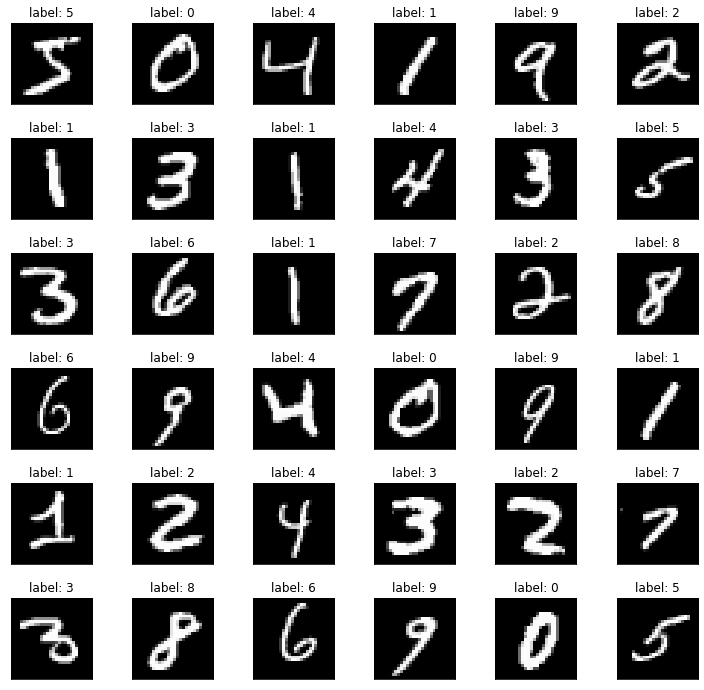

In [21]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.tight_layout()
    plt.imshow(train_data[i], cmap='gray', interpolation='none')
    plt.title("label: {}".format(train_label[i]))
    plt.xticks([])
    plt.yticks([])

![image-20201028083932841](images/image-20201028083932841.png)

## Fashion MNIST

![img](images/fashion-mnist-sprite.png)

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)是一个替代MNIST手写数字集的图像数据集。 它是由Zalando（一家德国的时尚科技公司）旗下的研究部门提供，它其涵盖了来自10种类别的共7万个不同商品的正面图。Fashion-MNIST完全克隆了MNIST的所有外在特征。

- 60000张训练图像和对应Label

- 10000张测试图像和对应Label

- 10个类别

  | Label |    Description     |
  | :---: | :----------------: |
  |   0   | T恤（T-shirt/top） |
  |   1   |  裤子（Trouser）   |
  |   2   | 套头衫（Pullover） |
  |   3   |  连衣裙（Dress）   |
  |   4   |    外套（Coat）    |
  |   5   |   凉鞋（Sandal）   |
  |   6   |   衬衫（Shirt）    |
  |   7   | 运动鞋（Sneaker）  |
  |   8   |     包（Bag）      |
  |   9   | 靴子（Ankle boot） |

- 每张图像28x28的分辨率，每个像素点用一个灰度值($0-255$)表示

- 4个GZ文件名称都一样

  | 数据文件                                                     | 描述         | 数据量 |
  | ------------------------------------------------------------ | ------------ | ------ |
  | [train-images-idx3-ubyte.gz](http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz) | training图片 | 60,000 |
  | [train-labels-idx1-ubyte.gz](http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz) | training标签 | 60,000 |
  | [t10k-images-idx3-ubyte.gz](http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz) | training图片 | 10,000 |
  | [t10k-labels-idx1-ubyte.gz](http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz) | training标签 | 10,000 |

Fashion-MNIST出现的原因之一是，MNIST太简单了。虽然MNIST被誉为数据科学领域的`果蝇`，但目前很多算法都能在其测试集上取得99.6%的超高准确率。

### 数据下载

的确不愧是MNIST的替代，只要设置source_url到新的地址，就可以下载了。

In [23]:
local_path = os.path.join('.', 'data/fashion-mnist')
train_data_path, train_label_path, test_data_path, test_label_path = mnist_download(local_path, source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com')

2020-11-21 08:43:34,561: INFO: http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
2020-11-21 08:43:53,957: INFO: Successfully downloaded train-images-idx3-ubyte.gz 26421880 bytes.
2020-11-21 08:43:53,958: INFO: http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
2020-11-21 08:43:55,464: INFO: Successfully downloaded train-labels-idx1-ubyte.gz 29515 bytes.
2020-11-21 08:43:55,465: INFO: http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
2020-11-21 08:43:59,264: INFO: Successfully downloaded t10k-images-idx3-ubyte.gz 4422102 bytes.
2020-11-21 08:43:59,265: INFO: http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz
2020-11-21 08:44:00,138: INFO: Successfully downloaded t10k-labels-idx1-ubyte.gz 5148 bytes.


![image-20201028072757363](images/image-20201028072757363.png)

### 读取数据

同样可以调用上文MNIST中的方法。

In [24]:
train_data = extract_data(train_data_path, 60000)
train_label = extract_label(train_label_path, 60000)
test_data = extract_data(test_data_path, 10000) 
test_label = extract_label(test_label_path, 10000)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

2020-11-21 08:44:00,145: INFO: Extracting ./data/fashion-mnist/train-images-idx3-ubyte.gz
2020-11-21 08:44:00,615: INFO: Extracting ./data/fashion-mnist/train-labels-idx1-ubyte.gz
2020-11-21 08:44:00,617: INFO: Extracting ./data/fashion-mnist/t10k-images-idx3-ubyte.gz
2020-11-21 08:44:00,696: INFO: Extracting ./data/fashion-mnist/t10k-labels-idx1-ubyte.gz


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


![image-20201028083349086](images/image-20201028083349086.png)

显示其中的图片。

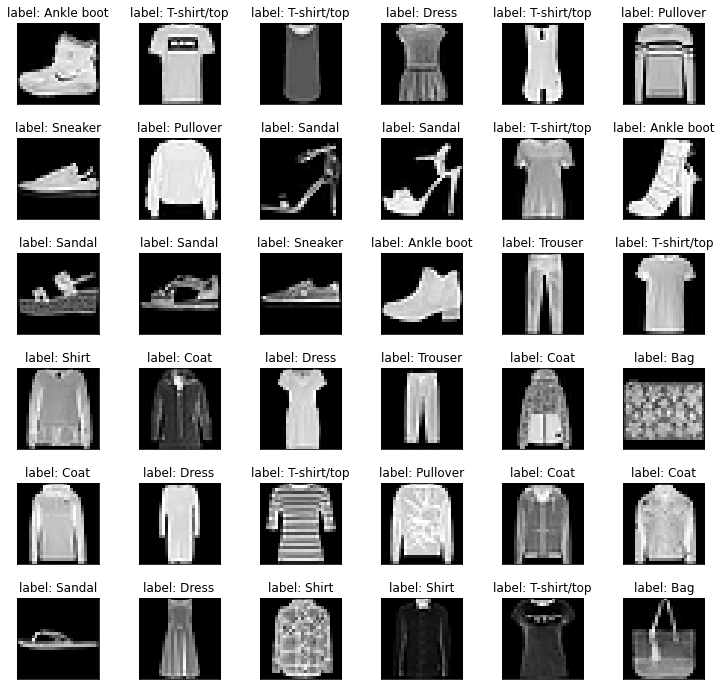

In [25]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
           'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.tight_layout()
    plt.imshow(train_data[i], cmap='gray', interpolation='none')
    plt.title("label: {}".format(labels[train_label[i]]))
    plt.xticks([])
    plt.yticks([])

![image-20201028083741432](images/image-20201028083741432.png)

## CIFAR10

![cifar10](images/cifar10.png)

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)数据集由10类32x32的彩色图片组成，一共包含60000张图片，每一类包含6000图片。其中50000张图片作为训练集，10000张图片作为测试集。

CIFAR-10数据集被划分成了5个训练的batch和1个测试的batch，每个batch均包含10000张图片。测试集batch的图片是从每个类别中随机挑选的1000张图片组成的,训练集batch以随机的顺序包含剩下的50000张图片。所有这些数据保存在一个压缩文件里，下载地址是：https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz。

### 数据下载

In [28]:
import logging
import os
import pickle
import tarfile
import six.moves.urllib as urllib

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

def cifar10_download_and_extract(target_path, source_url="https://www.cs.toronto.edu/~kriz", http_proxy=None):
    if http_proxy is not None:
        proxy_handler = urllib.request.ProxyHandler({'http': http_proxy, 'https': http_proxy})
        opener = urllib.request.build_opener(proxy_handler)
    else:
        opener = urllib.request.build_opener()

    urllib.request.install_opener(opener)

    def maybe_download(file_name):
        if not os.path.exists(target_path):
            os.mkdir(target_path)
        file_path = os.path.join(target_path, file_name)
        if not os.path.exists(file_path):
            source_file_url = os.path.join(source_url, file_name)
            logging.info(source_file_url)
            filepath, _ = urllib.request.urlretrieve(source_file_url, file_path)
            statinfo = os.stat(filepath)
            logging.info('Successfully downloaded {} {} bytes.'.format(file_name, statinfo.st_size))
        return file_path
    
    tar_gz_file = 'cifar-10-python.tar.gz'
    data_path= maybe_download(tar_gz_file)
    
    # extract the tar.gz file
    extract_path = os.path.join(target_path, "cifar-10-batches-py")
    logging.info("extract {} to {}".format(tar_gz_file, extract_path))
    with tarfile.open(data_path, 'r:gz') as tar:        
        tar.extractall(path=target_path)
    return extract_path

local_path = os.path.join('.', 'data/cifar10')
data_path = cifar10_download_and_extract(local_path)

2020-11-21 08:48:43,515: INFO: extract cifar-10-python.tar.gz to ./data/cifar10/cifar-10-batches-py


![image-20201022133621391](images/image-20201022133621391.png)

下载并解压后，其目录结构如下。其中batch 1-5是5个训练数据集，而test_batch是测试数据集。

![image-20201022132953540](images/image-20201022132953540.png)

### 读取数据

In [29]:
def extract_data_label(files):
    data = []
    label = []    
    for file in files:
        with open(file, 'rb') as fo:
            entry = pickle.load(fo, encoding='latin1')
        data.append(entry['data'])
        label.extend(entry['labels'])
 
    data = np.vstack(data)
    data = data.reshape(-1, 3, 32, 32)
    data = data.transpose((0, 2, 3, 1))   
    label = np.array(label)
    return data, label

train_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
train_files = [ os.path.join(data_path, file)  for file in train_files]
test_files = [ os.path.join(data_path, 'test_batch')]

train_data, train_label = extract_data_label(train_files)
test_data, test_label = extract_data_label(test_files)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


![image-20201022141210090](images/image-20201022141210090.png)

显示其中的图片。

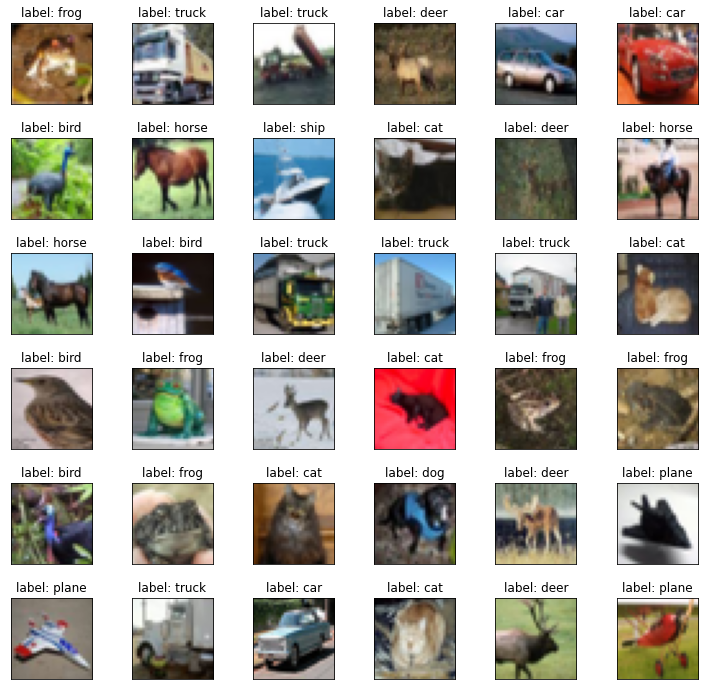

In [30]:
plt.figure(figsize=(10,10))
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

for i in range(36):
    plt.subplot(6,6,i+1)
    plt.tight_layout()
    plt.imshow(train_data[i])
    plt.title("label: {}".format(classes[train_label[i]]))
    plt.xticks([])
    plt.yticks([])

![image-20201022143439897](images/image-20201022143439897.png)



## IMDb : Large Movie Review Dataset

**IMDb**（Internet Movie Datebase ）是全球最大的互联网影视数据库，而[Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/) 是一个根据IMDB上电影评论而建立的数据集。它由斯坦福大学于 2011 年发布，相关论文有[Learning Word Vectors for Sentiment Analysis](https://ai.stanford.edu/~ang/papers/acl11-WordVectorsSentimentAnalysis.pdf)。

Large Movie Review Dataset包括 50,000 条标记情感的电影评论，其中正面（positive）和负面（negative）的数量各半，然后这些数据又被均匀的分为训练数据和测试数据。此外，它还有 50,000 条未标记情感的评论。在数据集中，每个电影的评论数不超过30条。需要注意的是，每一条标记情感的评论是极端正面或极端负面的，不包括中立的评论。规则如下。

- $score \le 4$：负面评论
- $score \ge 7$：正面评论

数据集下载地址是https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

### 数据下载

In [1]:
import gzip
import logging
import os
import tarfile
import six.moves.urllib as urllib

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

def lmrd_download_and_extract(target_path, source_url='https://ai.stanford.edu/~amaas/data/sentiment/', http_proxy=None):
    if http_proxy is not None:
        proxy_handler = urllib.request.ProxyHandler({'http': http_proxy, 'https': http_proxy})
        opener = urllib.request.build_opener(proxy_handler)
    else:
        opener = urllib.request.build_opener()

    urllib.request.install_opener(opener)

    def maybe_download(file_name):
        if not os.path.exists(target_path):
            os.mkdir(target_path)
        file_path = os.path.join(target_path, file_name)
        if not os.path.exists(file_path):
            source_file_url = os.path.join(source_url, file_name)
            logging.info(source_file_url)
            filepath, _ = urllib.request.urlretrieve(source_file_url, file_path)
            statinfo = os.stat(filepath)
            logging.info('Successfully downloaded {} {} bytes.'.format(file_name, statinfo.st_size))
        return file_path

    tar_gz_file = 'aclImdb_v1.tar.gz'
    data_path= maybe_download(tar_gz_file)
    
    # extract the tar.gz file
    extract_path = os.path.join(target_path, "aclImdb")
    logging.info("extract {} to {}".format(tar_gz_file, extract_path))
    with tarfile.open(data_path, 'r:gz') as tar:        
        tar.extractall(path=target_path)
    return extract_path

local_path = os.path.join('.', 'data/lmrd')
data_path = lmrd_download_and_extract(local_path)

2020-12-17 01:09:47,058: INFO: https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
2020-12-17 01:10:06,679: INFO: Successfully downloaded aclImdb_v1.tar.gz 84125825 bytes.
2020-12-17 01:10:06,680: INFO: extract aclImdb_v1.tar.gz to ./data/lmrd/aclImdb


![image-20201104120005508](images/image-20201104120005508.png)

下载并解压后，其目录结构如下。

![image-20201104115404253](images/image-20201104115404253.png)

- README：数据集说明。

- imdbEr.txt

  imdbEr.txt contains the expected rating for each token in imdb.vocab as computed by (Potts, 2011). The expected rating is a good way to get a sense for the average polarity of a word in the dataset.

  ~~~shell
  head imdbEr.txt
  ~~~

  ![image-20201104135810896](images/image-20201104135810896.png)

- imdb.vocab：总共有89,527个单词

  ~~~shell
  head imdb.vocab
  ~~~

  ![image-20201104135329191](images/image-20201104135329191.png)

- train：训练数据

  - labeledBow.feat：文件是[LIBSVM](https://blog.csdn.net/yangshaojun1992/article/details/87861767)数据格式。采用BOW方法对训练集25,000评论进行编码。下面是其中一行数据。

In [ ]:
![image-20201104135041675](images/image-20201104135041675.png)

其中`7`表示评分。`2:8`表示token为2的单词出现了7次。所有单词列表见imdb.vocab文件。

- unsupBow.feat：文件是LIBSVM格式。采用BOW方法对未标记的50,000评论进行编码。

  - urls_neg.txt：原本这个文件里有每个评论的url地址，但由于IMDB网站的变化，无法指向具体的评论，所以只提供了所评论电影的链接。

  - urls_pos.txt：同上

  - urls_unsup.txt：同上

  - neg：该目录包含12,500个负面评论的文本文件。

In [ ]:
~~~shell
ll train/neg | head -10
~~~

![image-20201104124737226](images/image-20201104124737226.png)

每个文件名都是[id]_[rating].txt的格式。

- id：唯一编号
- rating：表示用户的打分。从1-10。。可以看到rating都是大于等于4的。

- pos：该目录包含12,500个正面评论的文本文件。

In [ ]:
~~~shell
ll train/pos | head -10
~~~

![image-20201104125223528](images/image-20201104125223528.png)
  
每个文件名也都是[id]_[rating].txt的格式。可以看到rating都是大于等于7的。

- unsup：该目录包含50,000个正面评论的文本文件。

In [ ]:
~~~shell
ll train/unsup | head -10
~~~

![image-20201104125513716](images/image-20201104125513716.png)

每个文件名也都是[id]_[rating].txt的格式。只是所有的rating都是0。

- test：参考上面train目录下同名文件

### 读取数据

查看正面评论文件。

In [ ]:
train_dir = os.path.join(data_path, 'train/pos')
pos_files = os.listdir(train_dir)
for file_name in pos_files[0:3]:    
    file_path = os.path.join(train_dir, file_name)
    print('-'*30 + file_path + '-'*30 )
    with open(file_path) as f:
        comment = f.read() 
        print(comment if len(comment)<=800 else comment[0:800]+' ...')    

![image-20201105141514092](images/image-20201105141514092.png)

查看负面评论文件。

In [ ]:
train_dir = os.path.join(data_path, 'train/neg')
pos_files = os.listdir(train_dir)
for file_name in pos_files[0:3]:    
    file_path = os.path.join(train_dir, file_name)
    print('-'*30 + file_path + '-'*30 )
    with open(file_path) as f:
        comment = f.read() 
        print(comment if len(comment)<=800 else comment[0:800]+' ...')    

![image-20201105141742737](images/image-20201105141742737.png)

## 参考

- [Fashion-MNIST：替代MNIST手写数字集的图像数据集](https://zhuanlan.zhihu.com/p/28847070)

## 历史

- 2020-10-22：初始版本。包含MNIST和CIFAR10数据集合
- 2020-10-27：新增数据集Fashion MNIST
- 2020-11-04：增加数据集Large Movie Review Dataset

In [6]:
import logging
import os
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import six.moves.urllib as urllib
from PIL import Image

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

def eurosat_download_and_extract(target_path, source_url="http://madm.dfki.de/files/sentinel", http_proxy=None):
    if http_proxy is not None:
        proxy_handler = urllib.request.ProxyHandler({'http': http_proxy, 'https': http_proxy})
        opener = urllib.request.build_opener(proxy_handler)
    else:
        opener = urllib.request.build_opener()

    urllib.request.install_opener(opener)

    def maybe_download(file_name):
        if not os.path.exists(target_path):
            os.makedirs(target_path)
        file_path = os.path.join(target_path, file_name)
        if not os.path.exists(file_path):
            source_file_url = os.path.join(source_url, file_name)
            logging.info(source_file_url)
            filepath, _ = urllib.request.urlretrieve(source_file_url, file_path)
            statinfo = os.stat(filepath)
            logging.info('Successfully downloaded {} {} bytes.'.format(file_name, statinfo.st_size))
        return file_path
    
    tar_gz_file = 'EuroSAT.zip'
    data_path= maybe_download(tar_gz_file)
    
    # extract the tar.gz file
    extract_path = os.path.join(target_path, "2750")
    logging.info("extract {} to {}".format(tar_gz_file, extract_path))
    with zipfile.ZipFile(data_path, 'r') as zip_ref:
        zip_ref.extractall(target_path)
    return extract_path

local_path = os.path.join('.', 'data/eurosat')
data_path = eurosat_download_and_extract(local_path)

2020-11-19 03:34:10,791: INFO: extract EuroSAT.zip to ./data/eurosat/2750


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  # This is added back by InteractiveShellApp.init_path()


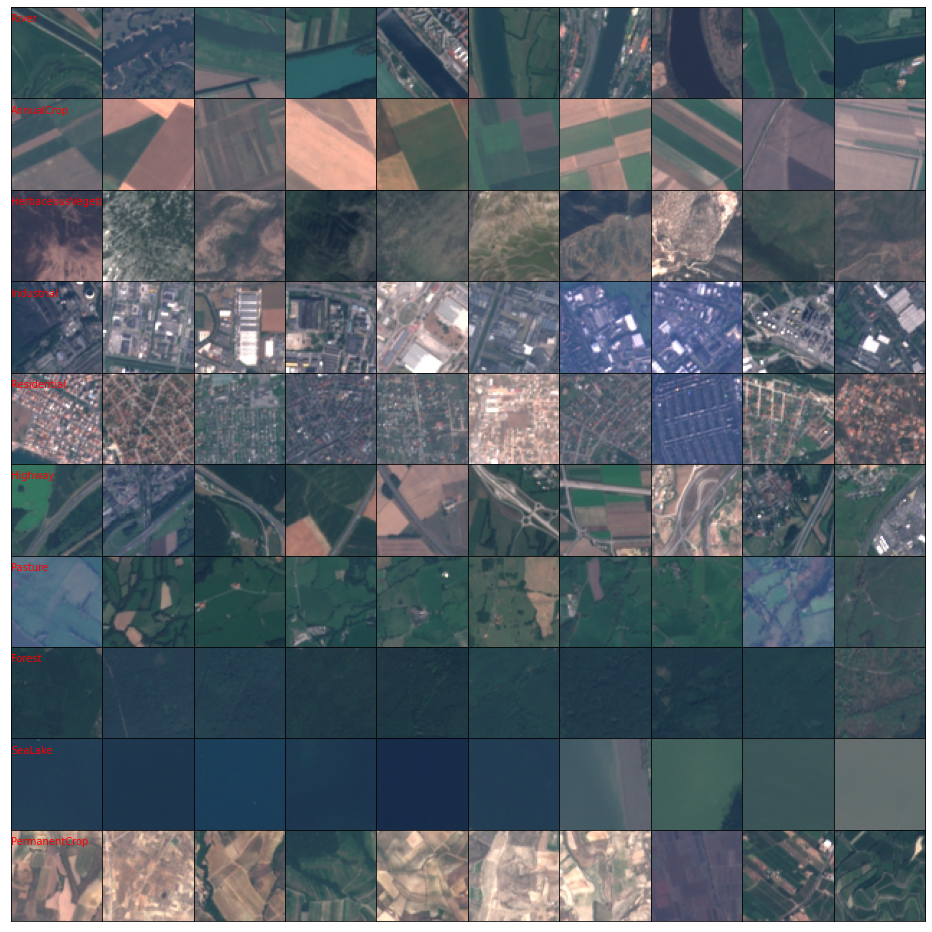

In [10]:
plt.figure(figsize=(13,13))

i = -1
label_cnt = 10
for label in os.listdir(data_path): 
    files = os.listdir(os.path.join(data_path, label))
    i = i+1
    if i>=label_cnt: break 
    for j in range(label_cnt):
        plt.subplot(label_cnt, label_cnt, label_cnt*i+j+1)
        plt.tight_layout()
        file_path =  os.path.join(data_path, label, files[j])
        image = Image.open(file_path)
        if j==0: plt.text(0, 10, label, color='red')
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])

plt.subplots_adjust(wspace=0, hspace=0)        
plt.show()

In [9]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.2.0


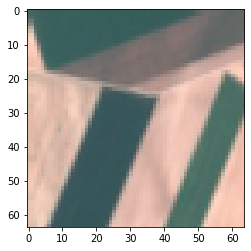

In [24]:
file_path =  os.path.join(data_path, 'AnnualCrop/AnnualCrop_19.jpg')
image = Image.open(file_path)
plt.imshow(image)

In [26]:

x.shape

(64, 64, 3)

In [43]:
def extract_data_label(data_path, labels):
    data = []
    label = []    
    
    i = 0
    for child in labels: 
        files = os.listdir(os.path.join(data_path, child))
        for file in files:
            file_path =  os.path.join(data_path, child, file)
            image = Image.open(file_path)
            x = np.asarray(image)
            data.append(x)
            label.append(i)
        i = i + 1

    data = np.stack(data, axis=0)
    label = np.array(label)
    return data, label

classes = os.listdir(data_path)
data, label = extract_data_label(data_path, labels)

print(data.shape)
print(label.shape)
print(classes)

(27000, 64, 64, 3)
(27000,)
['River', 'AnnualCrop', 'HerbaceousVegetation', 'Industrial', 'Residential', 'Highway', 'Pasture', 'Forest', 'SeaLake', 'PermanentCrop']


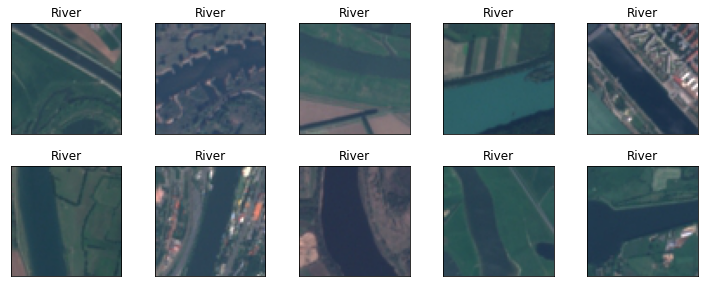

In [51]:
plt.figure(figsize=(10,10))

indexes = range(25)
for i,index in enumerate(indexes):

    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.imshow(data[index])
    plt.title("{}".format(classes[label[index]]))
    plt.xticks([])
    plt.yticks([])
       
plt.show()    

In [24]:
import h5py
import logging
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import scipy.io as scio
import tarfile
import six.moves.urllib as urllib
from PIL import Image
from pprint import pprint

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

def svhn_download_and_extract(target_path, foramt='format2', source_url="http://ufldl.stanford.edu/housenumbers/", http_proxy=None):
    if http_proxy is not None:
        proxy_handler = urllib.request.ProxyHandler({'http': http_proxy, 'https': http_proxy})
        opener = urllib.request.build_opener(proxy_handler)
    else:
        opener = urllib.request.build_opener()

    urllib.request.install_opener(opener)

    def maybe_download(file_name):
        if not os.path.exists(target_path):
            os.makedirs(target_path)
        file_path = os.path.join(target_path, file_name)
        if not os.path.exists(file_path):
            source_file_url = os.path.join(source_url, file_name)
            logging.info(source_file_url)
            filepath, _ = urllib.request.urlretrieve(source_file_url, file_path)
            statinfo = os.stat(filepath)
            logging.info('Successfully downloaded {} {} bytes.'.format(file_name, statinfo.st_size))
        return file_path

    def extract_targz(tar_gz_file, extract_path):
        extract_path = os.path.join(target_path, extract_path)
        if not os.path.exists(extract_path):
            logging.info("extract {} to {}".format(os.path.basename(tar_gz_file), extract_path))
            with tarfile.open(tar_gz_file, 'r:gz') as tar:        
                tar.extractall(path=target_path)
        return extract_path
            
    assert (foramt == 'format2' or foramt == 'format1')
    if foramt == 'format2':
        train_file = 'train_32x32.mat'
        test_file = 'test_32x32.mat'
        extra_file = 'extra_32x32.mat'
    else:
        train_file = 'train.tar.gz'
        test_file = 'test.tar.gz'
        extra_file = 'extra.tar.gz'        
        
    train_path= maybe_download(train_file)
    test_path= maybe_download(test_file)
    extra_path= maybe_download(extra_file)    
    
    # extract the tar.gz file
    if foramt == 'format1': 
        train_path = extract_targz(train_path, 'train')
        test_path = extract_targz(test_path, 'test')
        extra_path = extract_targz(extra_path, 'extra')
    return train_path, test_path, extra_path

f1_train_path, f1_test_path, f1_extra_path = svhn_download_and_extract('./data/svhn/format1', foramt='format1')
f2_train_path, f2_test_path, f2_extra_path = svhn_download_and_extract('./data/svhn/format2', foramt='format2')

In [6]:
print(f1_train_path, f1_test_path, f1_extra_path)

./data/svhn/format1/train ./data/svhn/format1/test ./data/svhn/format1/extra


In [7]:
print(f2_train_path, f2_test_path, f2_extra_path)
import scipy.io as sio

./data/svhn/format2/train_32x32.mat ./data/svhn/format2/test_32x32.mat ./data/svhn/format2/extra_32x32.mat


In [109]:
def extract_data_label(data_path, format='format2'):
    data = sio.loadmat(data_path)
    #print(data['__header__'], data['__version__'], data['__globals__'], sep="\t")
    X = data['X'].swapaxes(0, 3).swapaxes(2, 3).swapaxes(1, 2)
    y = data['y']
    return X, y


train_data, train_label = extract_data_label(f2_train_path)
test_data, test_label  = extract_data_label(f2_test_path)
extra_data, extra_label = extract_data_label(f2_extra_path)

print(train_data.shape, train_label.shape)
print(test_data.shape, test_label.shape)
print(extra_data.shape, extra_label.shape)

(73257, 32, 32, 3) (73257, 1)
(26032, 32, 32, 3) (26032, 1)
(531131, 32, 32, 3) (531131, 1)


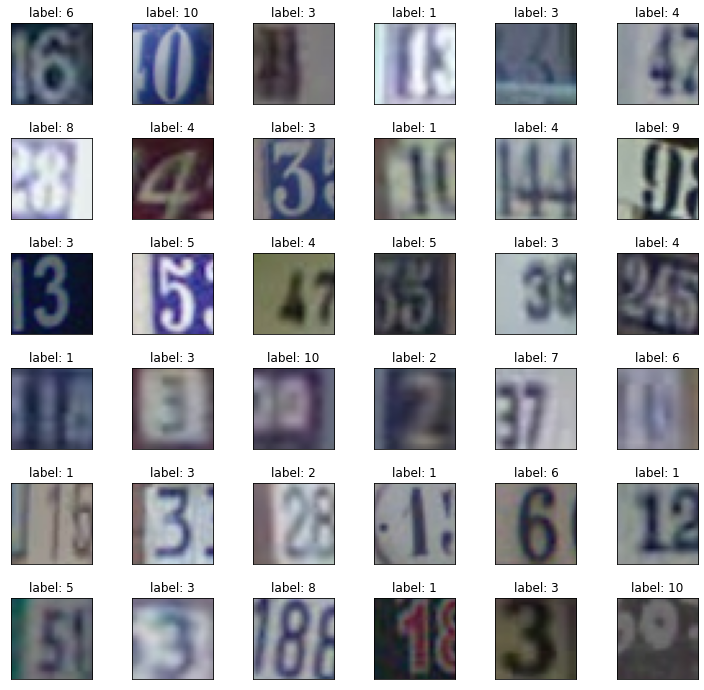

[ 1  2  3  4  5  6  7  8  9 10]


In [74]:
plt.figure(figsize=(10,10))

for i in range(36):
    plt.subplot(6,6,i+1)
    plt.tight_layout()
    index = random.randint(0, len(train_data))
    plt.imshow(train_data[index])
    plt.title("label: {}".format(train_label[index,0]))
    plt.xticks([])
    plt.yticks([])
plt.show()
    
print(np.unique(train_label))

In [65]:
import random

In [59]:
train_label[train_label==1]

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [70]:
np.unique(train_label)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [63]:
np.where(train_label == 10)

(array([   52,    84,    93, ..., 73193, 73220, 73239]),
 array([0, 0, 0, ..., 0, 0, 0]))

[ 1  2  3  4  5  6  7  8  9 10]


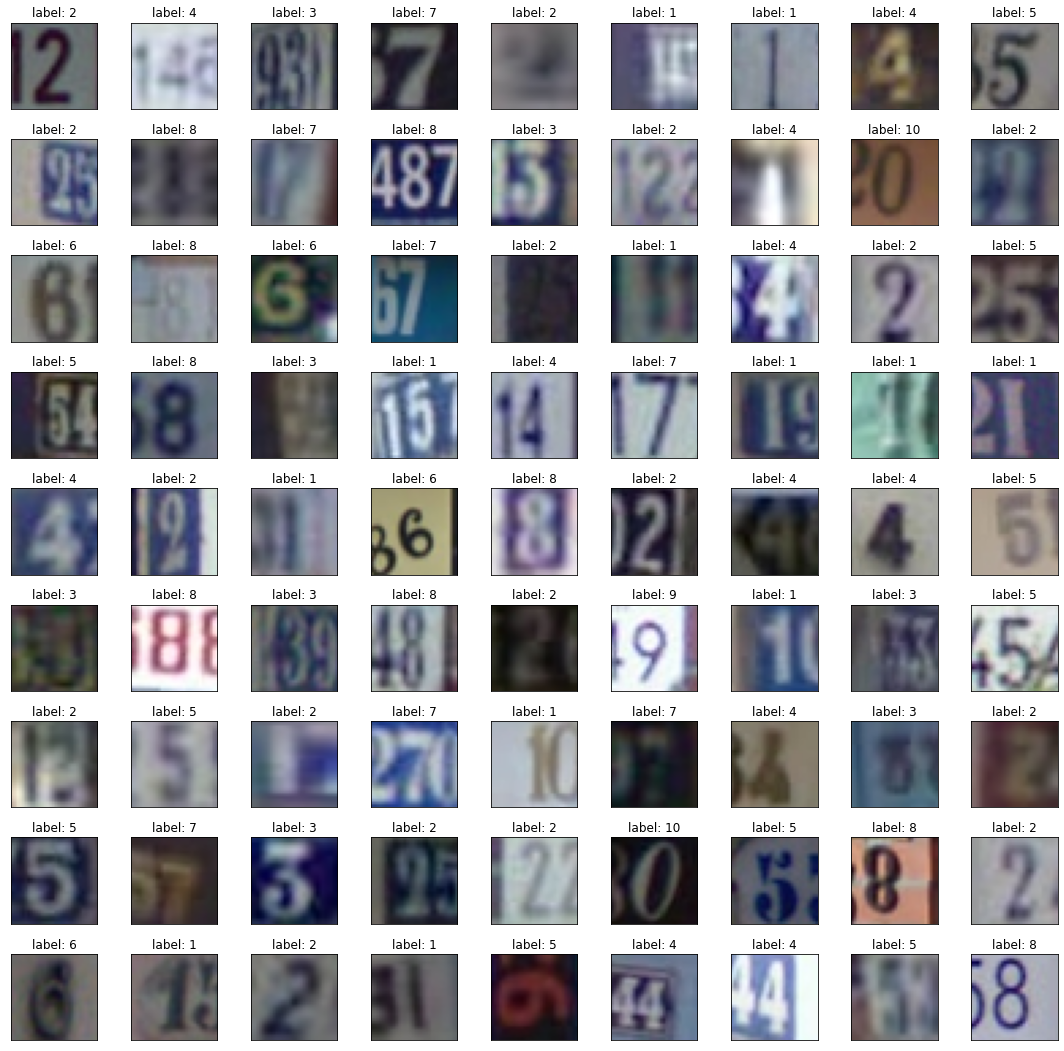

In [71]:
plt.figure(figsize=(15,15))

for i in range(81):
    plt.subplot(9,9,i+1)
    plt.tight_layout()
    index = random.randint(0, len(train_data))
    plt.imshow(train_data[index])
    plt.title("label: {}".format(train_label[index,0]))
    plt.xticks([])
    plt.yticks([])
    
print(np.unique(train_label))

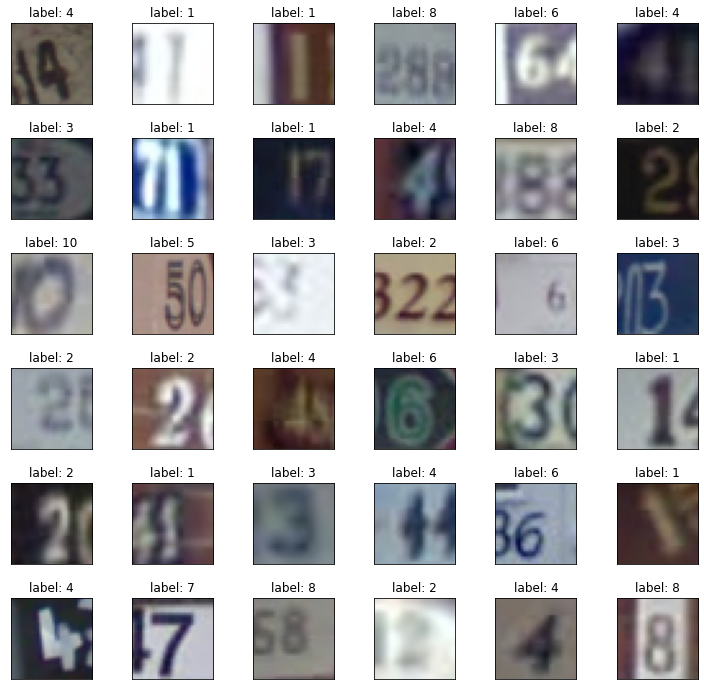

[ 1  2  3  4  5  6  7  8  9 10]


In [77]:
plt.figure(figsize=(10,10))

for i in range(36):
    plt.subplot(6,6,i+1)
    plt.tight_layout()
    index = random.randint(0, len(test_data))
    plt.imshow(test_data[index])
    plt.title("label: {}".format(test_label[index,0]))
    plt.xticks([])
    plt.yticks([])
plt.show()
    
print(np.unique(train_label))  

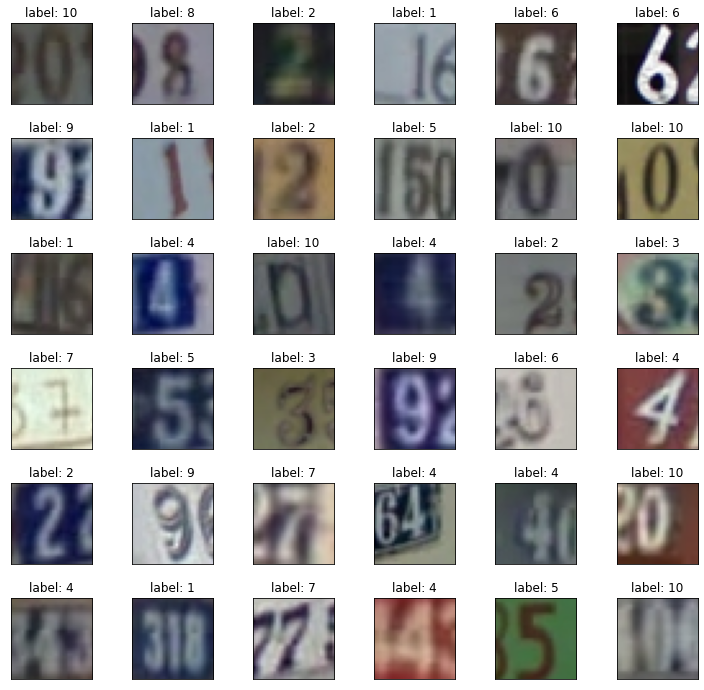

[ 1  2  3  4  5  6  7  8  9 10]


In [78]:
plt.figure(figsize=(10,10))

for i in range(36):
    plt.subplot(6,6, i+1)
    plt.tight_layout()
    index = random.randint(0, len(extra_data))
    plt.imshow(extra_data[index])
    plt.title("label: {}".format(extra_label[index,0]))
    plt.xticks([])
    plt.yticks([])
plt.show()
    
print(np.unique(train_label))  

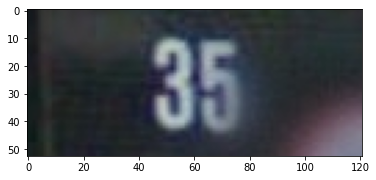

In [90]:
file_path =  os.path.join(f1_train_path, '4621.png')
image = Image.open(file_path)
plt.imshow(image)

In [1]:
import h5py
import logging
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.io as scio
import tarfile
import six.moves.urllib as urllib
from PIL import Image

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

In [106]:
def get_img_name(f, idx=0):
    names = f['digitStruct/name']
    img_name = ''.join(map(chr, f[names[idx][0]][()].flatten()))
    return(img_name)

def get_img_boxes(f, idx=0):
    """
    get the 'height', 'left', 'top', 'width', 'label' of bounding boxes of an image
    :param f: h5py.File
    :param idx: index of the image
    :return: dictionary
    """
    bboxs = f['digitStruct/bbox']

    bbox_prop = ['height', 'left', 'top', 'width', 'label']
    meta = { key : [] for key in bbox_prop}

    box = f[bboxs[idx][0]]
    for key in box.keys():
        if box[key].shape[0] == 1:
            meta[key].append(int(box[key][0][0]))
        else:
            for i in range(box[key].shape[0]):
                meta[key].append(int(f[box[key][i][0]][()].item()))

    return meta

def extract_digit_struct(data_path, n=1):   
    f = load_digit_struct(data_path)
    max = f['digitStruct/name'].shape[0]
    digit_structs = []
    for _ in range(n):
        idx = random.randint(0, max)
        digit_struct = get_img_boxes(f, idx)
        digit_struct['img_file'] = os.path.join(data_path, get_img_name(f, idx)) 
        digit_structs.append(digit_struct)
    return digit_structs  


def load_digit_struct(datapath):
    # 加载digitStruct.mat文件
    digit_file = os.path.join(f1_train_path, 'digitStruct.mat')   
    f = h5py.File(digit_file, 'r') 

    return f

f = load_digit_struct(f1_train_path)

print("f =", f)
print("f.keys() =", f.keys())
print("f['digitStruct'].keys() =", f['digitStruct'].keys())

f = <HDF5 file "digitStruct.mat" (mode r)>
f.keys() = <KeysViewHDF5 ['#refs#', 'digitStruct']>
f['digitStruct'].keys() = <KeysViewHDF5 ['bbox', 'name']>


In [101]:
names = f['digitStruct/name']
bboxs = f['digitStruct/bbox']
print("f['digitStruct/name'] =", names)
print("f['digitStruct/bbox'] =", bboxs)

print("names[0] =", names[0])
print("bboxs[0] =", bboxs[0])

print('-'*50)
# 第一个图片。
box = f[bboxs[0][0]]
print("f[names[0][0]][()] =\n", f[names[0][0]][()])  # 文件名，每个字符都用ascii编码
print("f[bboxs[0][0]].keys() =", box.keys())

# 第一个图片的第一个选取框
print("f[box['height'][0][0]][()] =", f[box['height'][0][0]][()])
print("f[box['left'][0][0]][()] =", f[box['left'][0][0]][()])
print("f[box['top'][0][0]][()] =", f[box['top'][0][0]][()])
print("f[box['width'][0][0]][()] =", f[box['width'][0][0]][()])
print("f[box['label'][0][0]][()] =", f[box['label'][0][0]][()])

f['digitStruct/name'] = <HDF5 dataset "name": shape (33402, 1), type "|O">
f['digitStruct/bbox'] = <HDF5 dataset "bbox": shape (33402, 1), type "|O">
names[0] = [<HDF5 object reference>]
bboxs[0] = [<HDF5 object reference>]
--------------------------------------------------
f[names[0][0]][()] =
 [[ 49]
 [ 46]
 [112]
 [110]
 [103]]
f[bboxs[0][0]].keys() = <KeysViewHDF5 ['height', 'label', 'left', 'top', 'width']>
f[box['height'][0][0]][()] = [[219.]]
f[box['left'][0][0]][()] = [[246.]]
f[box['top'][0][0]][()] = [[77.]]
f[box['width'][0][0]][()] = [[81.]]
f[box['label'][0][0]][()] = [[1.]]


In [107]:
# 加载一些图片
digit_structs = extract_digit_struct(f1_train_path, 16)
pprint(digit_structs[0])

{'height': [41, 41, 41],
 'img_file': './data/svhn/format1/train/31761.png',
 'label': [1, 9, 2],
 'left': [60, 75, 95],
 'top': [13, 18, 19],
 'width': [15, 19, 19]}


In [66]:
f.keys()

<KeysViewHDF5 ['#refs#', 'digitStruct']>

In [70]:
f['#refs#'].keys()

<KeysViewHDF5 ['#a', '0', '00', '00b', '00c', '00d', '00e', '00f', '00g', '00h', '00i', '00j', '00k', '00l', '00m', '00n', '00o', '00p', '00q', '00r', '00s', '00t', '00u', '00v', '00w', '00x', '00y', '00z', '01', '01b', '01c', '01d', '01e', '01f', '01g', '01h', '01i', '01j', '01k', '01l', '01m', '01n', '01o', '01p', '01q', '01r', '01s', '01t', '01u', '01v', '01w', '01x', '01y', '01z', '02', '02b', '02c', '02d', '02e', '02f', '02g', '02h', '02i', '02j', '02k', '02l', '02m', '02n', '02o', '02p', '02q', '02r', '02s', '02t', '02u', '02v', '02w', '02x', '02y', '02z', '03', '03b', '03c', '03d', '03e', '03f', '03g', '03h', '03i', '03j', '03k', '03l', '03m', '03n', '03o', '03p', '03q', '03r', '03s', '03t', '03u', '03v', '03w', '03x', '03y', '03z', '04', '04b', '04c', '04d', '04e', '04f', '04g', '04h', '04i', '04j', '04k', '04l', '04m', '04n', '04o', '04p', '04q', '04r', '04s', '04t', '04u', '04v', '04w', '04x', '04y', '04z', '05', '05b', '05c', '05d', '05e', '05f', '05g', '05h', '05i', '05j', 

In [56]:
digit_struct = digit_structs[0]
print(digit_struct['label'])
''.join([str(label) for label in digit_struct['label']])

[4, 5]


'4,5'

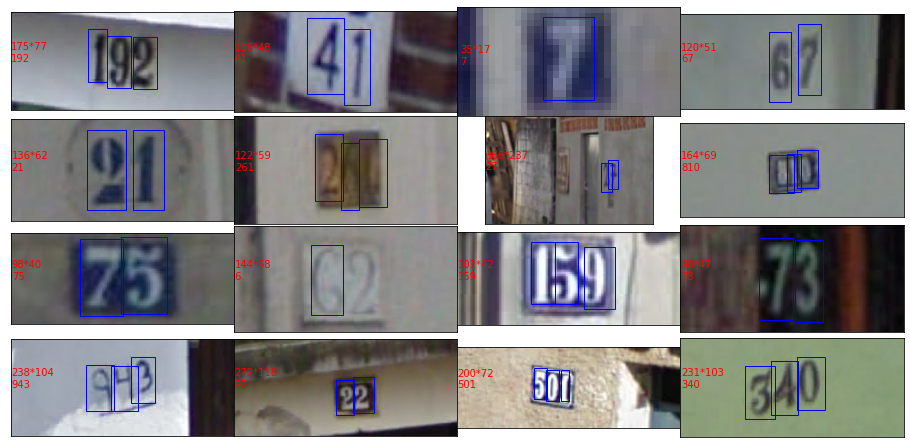

In [108]:
plt.figure(figsize=(16,8))


for i, digit_struct in enumerate(digit_structs): 
    ax = plt.subplot(4, 4, i+1)
    image = Image.open(digit_struct['img_file'])
    plt.imshow(image)
    labels = ''.join([str(label if label!=10 else 0) for label in digit_struct['label']])
    text = '{}*{}\n{}'.format(image.size[0], image.size[1], labels)
    plt.text(0, image.size[1]/2, text, color='red')
    for j in range(len(digit_struct['label'])):
        top = max(digit_struct['top'][j],1);
        height = min(digit_struct['height'][j], image.size[1]-digit_struct['top'][j]);
        left = max(digit_struct['left'][j],1);
        width = min(digit_struct['width'][j], image.size[0]-digit_struct['left'][j]);       
        rect = plt.Rectangle((left,top), width, height, fill=False, edgecolor = 'blue', linewidth=1)
        ax.add_patch(rect)
    plt.xticks([])
    plt.yticks([])

plt.subplots_adjust(wspace=0, hspace=0)        
plt.show()

In [ ]:
rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rect)
label(grid[1], "Rectangle")

someX, someY = 0.5, 0.5
fig,ax = plt.subplots()
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((someX - 0.1, someY - 0.1), 0.2, 0.2,
                      alpha=1, facecolor='none'))

In [5]:
import h5py
f = h5py.File(os.path.join(f1_test_path, 'digitStruct.mat'), 'r')

In [26]:
print(f.keys())
print(f.values())
# print(f['#refs#'].shape)
print(f['digitStruct'].keys())
print(f['digitStruct']['bbox'].shape)
print(f['digitStruct']['name'].shape)
f['digitStruct/name'].shape[0]
# print(f['digitStruct']['bbox'][0:10])
# print(f['digitStruct']['name'][0:10])

<KeysViewHDF5 ['#refs#', 'digitStruct']>
ValuesViewHDF5(<HDF5 file "digitStruct.mat" (mode r)>)
<KeysViewHDF5 ['bbox', 'name']>
(13068, 1)
(13068, 1)


13068

In [7]:
names = f['digitStruct/name']
bboxs = f['digitStruct/bbox']

In [8]:
f[names[0][0]][()]

array([[ 49],
       [ 46],
       [112],
       [110],
       [103]], dtype=uint16)

In [9]:
def get_img_name(f, idx=0):
    img_name = ''.join(map(chr, f[names[idx][0]][()].flatten()))
    return(img_name)

In [10]:
def get_img_boxes(f, idx=0):
    """
    get the 'height', 'left', 'top', 'width', 'label' of bounding boxes of an image
    :param f: h5py.File
    :param idx: index of the image
    :return: dictionary
    """
    meta = { key : [] for key in ['height', 'left', 'top', 'width', 'label']}

    box = f[bboxs[idx][0]]
    for key in box.keys():
        if box[key].shape[0] == 1:
            meta[key].append(int(box[key][0][0]))
        else:
            for i in range(box[key].shape[0]):
                meta[key].append(int(f[box[key][i][0]][()].item()))

    return meta

In [11]:
max = f['digitStruct/name'].shape[0]
for _ in range(5):
    print('-'*50)
    idx = random.randint(0, max - 1)
    print(idx, get_img_name(f, idx), get_img_boxes(f, idx))

--------------------------------------------------
9790 9791.png {'height': [29, 29], 'left': [54, 75], 'top': [18, 20], 'width': [19, 9], 'label': [2, 1]}
--------------------------------------------------
8693 8694.png {'height': [22, 22], 'left': [52, 58], 'top': [25, 25], 'width': [10, 12], 'label': [9, 5]}
--------------------------------------------------
6210 6211.png {'height': [24, 24], 'left': [28, 37], 'top': [7, 7], 'width': [9, 9], 'label': [1, 2]}
--------------------------------------------------
1716 1717.png {'height': [41, 41], 'left': [280, 302], 'top': [71, 72], 'width': [24, 13], 'label': [9, 3]}
--------------------------------------------------
131 132.png {'height': [38, 38], 'left': [59, 74], 'top': [17, 18], 'width': [20, 21], 'label': [3, 6]}


In [156]:
f[names[12584 ][0]][()].flatten()

array([ 49,  50,  53,  56,  53,  46, 112, 110, 103], dtype=uint16)

In [152]:
map(chr, f[names[10611][0]][()].flatten())

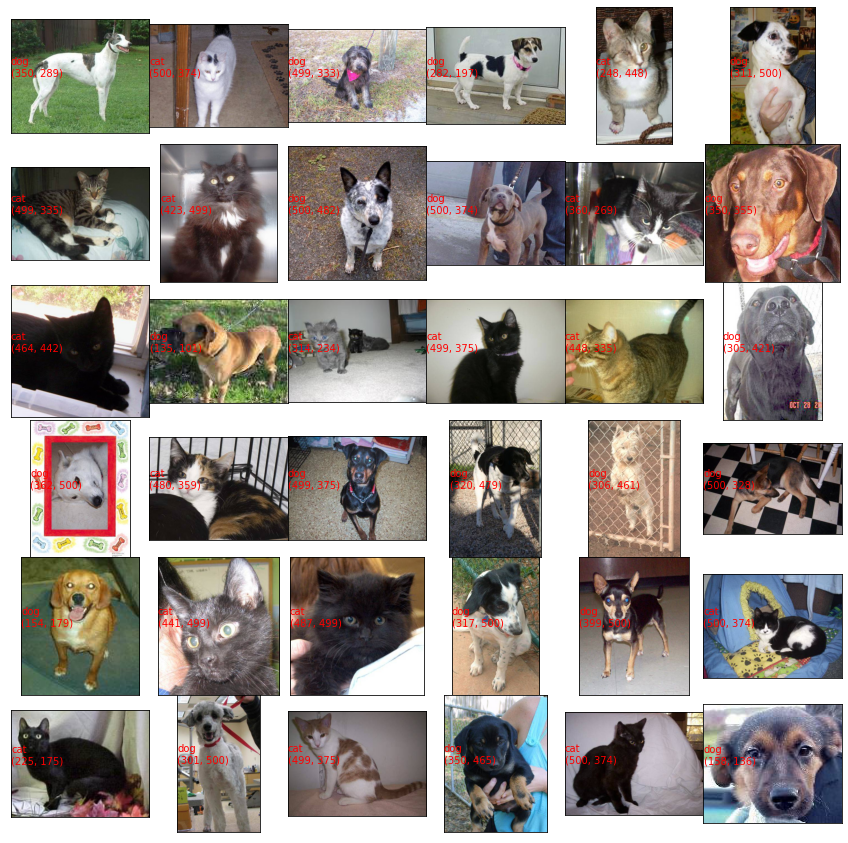

In [23]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

label_cnt = 6

train_path = 'data/dogs-vs-cats/train'
train_files = os.listdir(train_path)
random.seed(1031)
sample_indexes = np.random.randint(0, len(train_files), size = label_cnt*label_cnt ) 

plt.figure(figsize=(12,12))

for i, index in enumerate(sample_indexes): 
    plt.subplot(label_cnt, label_cnt, i+1)
    plt.tight_layout()
    file_name = train_files[index]
    file_path =  os.path.join(train_path, file_name)
    image = Image.open(file_path)
    plt.text(0, image.size[1]/2, '{}\n{}'.format(file_name[0:3],image.size), color='red')
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

plt.subplots_adjust(wspace=0, hspace=0)        
plt.show()

In [59]:
filenames = os.listdir(train_path)
classes = []
for filename in filenames:
    label = filename.split('.')[0]
    if label == 'dog':
        classes.append('1')
    else:
        classes.append('0')

df_train = pd.DataFrame({
    'filename': filenames,
    'class': classes
})

df_train.tail()

filename class
24995  dog.9995.jpg     1
24996  dog.9996.jpg     1
24997  dog.9997.jpg     1
24998  dog.9998.jpg     1
24999  dog.9999.jpg     1

In [60]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    train_path,
    x_col="filename",
    y_col="class",  
    class_mode='binary',
    target_size=(128, 128),
    batch_size=36
)

Found 25000 validated image filenames belonging to 2 classes.


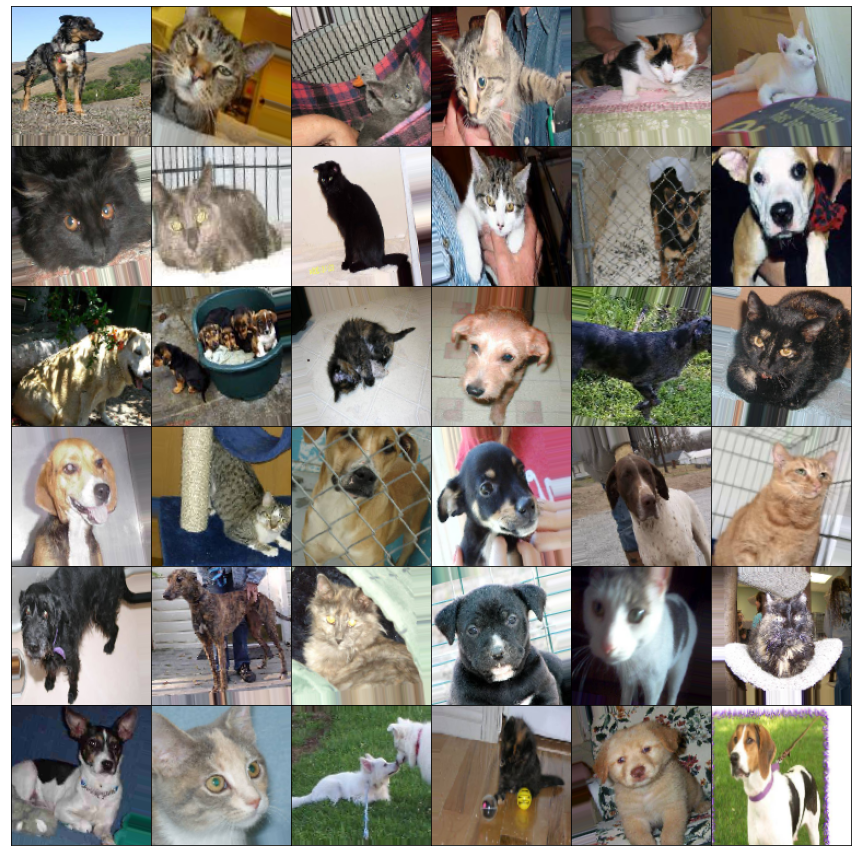

In [71]:
plt.figure(figsize=(12, 12))

images, classes = train_generator.next()
for i, image in enumerate(images):
    plt.subplot(6, 6, i+1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])    

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)      
plt.show()